# MLOps Assignment-1: Group 90

## Group Members Name with Student ID:
<table style="margin-left: 0; text-align: left;">
  <tr>
    <th>BITS ID</th>
    <th>NAME</th>
    <th>CONTRIBUTION</th>
  </tr>
  <tr>
    <td>2024AA05119</td>
    <td>RANGA SRINIVASAN V</td>
    <td>100 %</td>
  </tr>
  <tr>
    <td>2024AA05012</td>
    <td>VAMSI A</td>
    <td>100 %</td>
  </tr>
  <tr>
    <td>2024AA05013</td>
    <td>GUNDUBOGULA YUKTHI MUKESH</td>
    <td>100 %</td>
  </tr>
  <tr>
    <td>2024AA05209</td>
    <td>NANTHAKUMAR M</td>
    <td>100 %</td>
  </tr>
  <tr>
    <td>2024AA05216</td>
    <td>NITESH SINGH</td>
    <td>100 %</td>
  </tr>
</table>

### Confusion Matrix Visualization from Logged Artifacts

In this section, we visualize the confusion matrices for the **Logistic Regression** model
using evaluation artifacts saved during training.

- The confusion matrices were logged as a JSON file containing flattened values:
  `[True Negative, False Positive, False Negative, True Positive]`.
- We reconstruct the 2×2 confusion matrices for both the **validation** and **test** sets.
- Heatmaps are used to clearly highlight correct and incorrect predictions.

This visualization helps assess classification errors, which is especially important
for healthcare-related predictions.


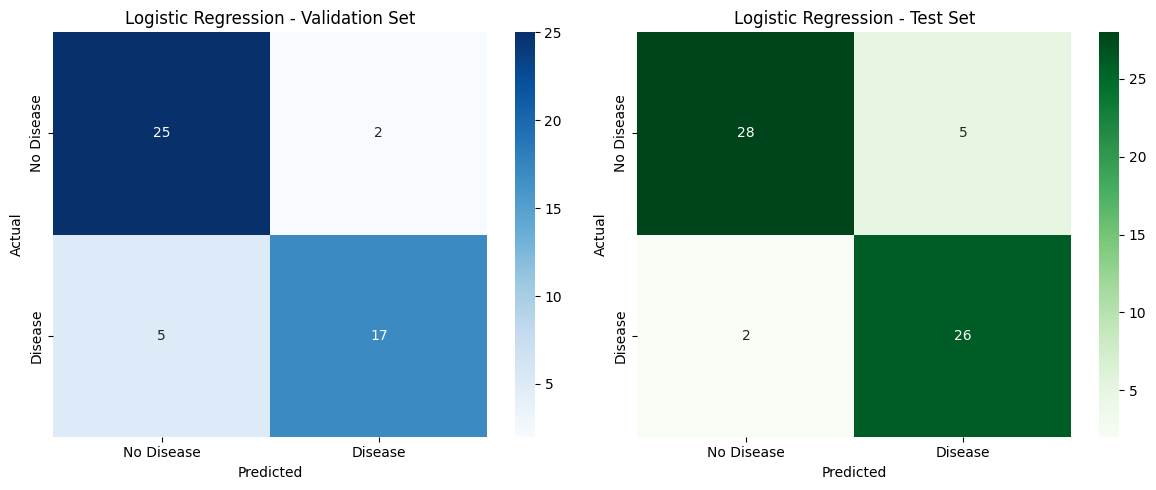

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load the confusion matrix artifact saved during model evaluation
with open("../artifacts/logreg_confusion.json", "r") as f:
    cm_data = json.load(f)

# Extract flattened confusion matrix values
# Order: [True Negative, False Positive, False Negative, True Positive]
val_tn, val_fp, val_fn, val_tp = cm_data["val_confusion_tn_fp_fn_tp"]
test_tn, test_fp, test_fn, test_tp = cm_data["test_confusion_tn_fp_fn_tp"]

# Reconstruct 2x2 confusion matrices
val_cm = [
    [val_tn, val_fp],
    [val_fn, val_tp]
]

test_cm = [
    [test_tn, test_fp],
    [test_fn, test_tp]
]

# Create a figure with two side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot validation confusion matrix
sns.heatmap(
    val_cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Disease", "Disease"],
    yticklabels=["No Disease", "Disease"],
    ax=axs[0]
)
axs[0].set_title("Logistic Regression - Validation Set")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

# Plot test confusion matrix
sns.heatmap(
    test_cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["No Disease", "Disease"],
    yticklabels=["No Disease", "Disease"],
    ax=axs[1]
)
axs[1].set_title("Logistic Regression - Test Set")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### ROC Curve for Final Model (Random Forest)

This section visualizes the **ROC Curve** for the final trained model using the validation set.

Steps:
- The model is reloaded from the saved `.joblib` artifact to ensure reproducibility.
- The dataset is reloaded and preprocessed (missing value handling and type casting).
- The target variable is **binarized**: values > 0 are mapped to 1 (presence of disease), else 0.
- A stratified train–validation split is used to preserve class distribution.
- The **ROC curve** is plotted using `RocCurveDisplay` to evaluate model discrimination performance.

The ROC curve shows the trade-off between true positive rate and false positive rate. This is especially useful in medical applications where minimizing false negatives is critical.


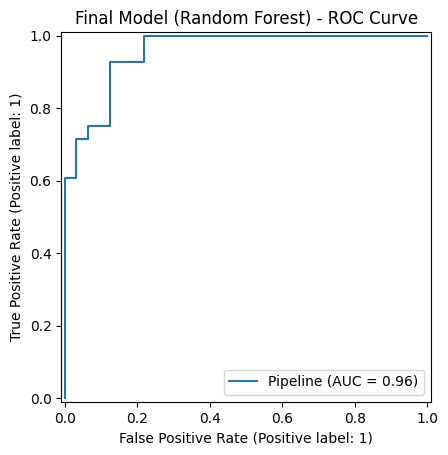

In [2]:
import warnings
from sklearn.exceptions import InconsistentVersionWarning

# Suppress version mismatch warnings when loading joblib models
warnings.filterwarnings("ignore", category=InconsistentVersionWarning)

import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Load the trained model pipeline from disk (includes preprocessing + classifier)
model = joblib.load("../artifacts/model.joblib")

# Load the dataset from processed Cleveland heart disease data
df = pd.read_csv("../data/processed/uci_heart_extracted/processed.cleveland.data", header=None)

# Add meaningful column names
df.columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Replace placeholder missing values and drop rows with nulls
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)
df = df.astype(float)

# Convert the multiclass target into binary (0 = No Disease, 1 = Disease)
df["target"] = (df["target"] > 0).astype(int)

# Split features and labels
X = df.drop("target", axis=1)
y = df["target"]

# Create a stratified train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Plot the ROC curve for the final model using validation data
RocCurveDisplay.from_estimator(model, X_val, y_val)
plt.title("Final Model (Random Forest) - ROC Curve")
plt.show()


## Conclusion:

The ROC curve of the final Random Forest model shows excellent classification performance
with a high AUC (~0.96). This indicates that the model has strong ability to distinguish
between positive (disease) and negative (no disease) cases.

This visualization supports the selection of the Random Forest model as the final deployed model.
